In [12]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# set plot style for better visuals
sns.set_style("whitegrid")
%matplotlib inline 

# 1. Load the dataset
# Assuming you have the dataset downloaded from Kaggle
df = pd.read_csv('BodyFat.csv')

In [26]:
# Load the CSV file
df = pd.read_csv('C:/Users/KhanFai1/Downloads/bodyfat.csv')

# Display the first few rows to confirm it loaded
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [27]:
# Shape of df
print("Shape of the dataset:", df.shape)

Shape of the dataset: (252, 15)


In [5]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [6]:
# Summary statics of df
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
# double check for missing values
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [8]:
# Standard view of head and tail
df.head()
df.tail()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


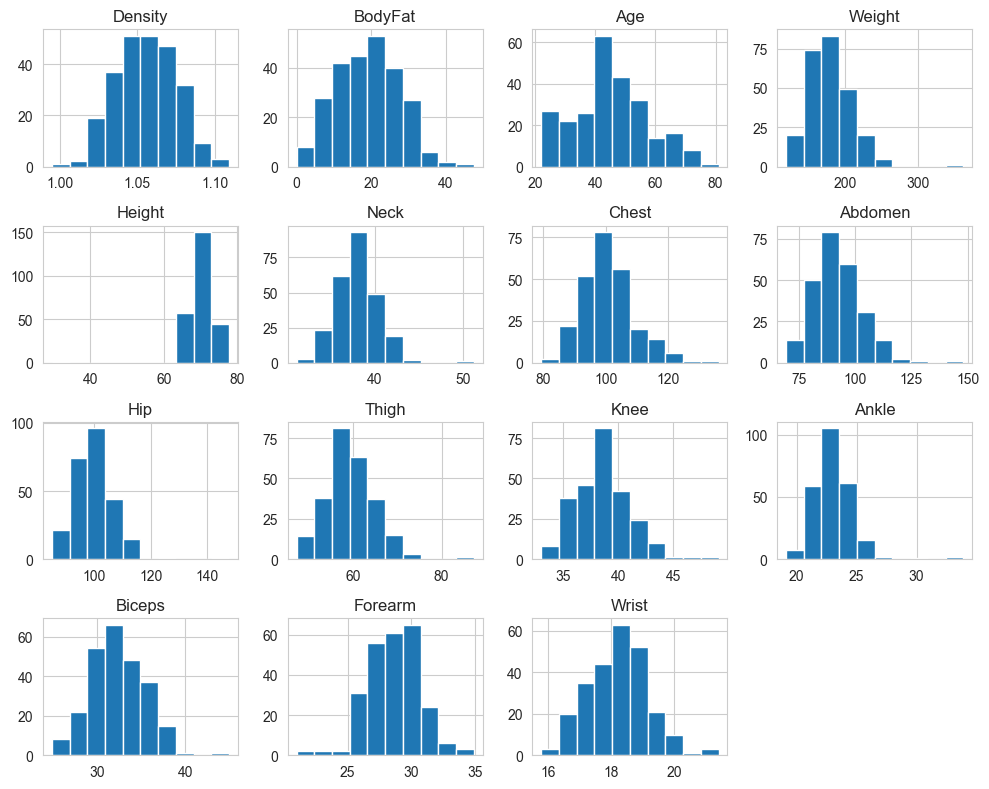

In [ ]:
# Histogram of numeric columns
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

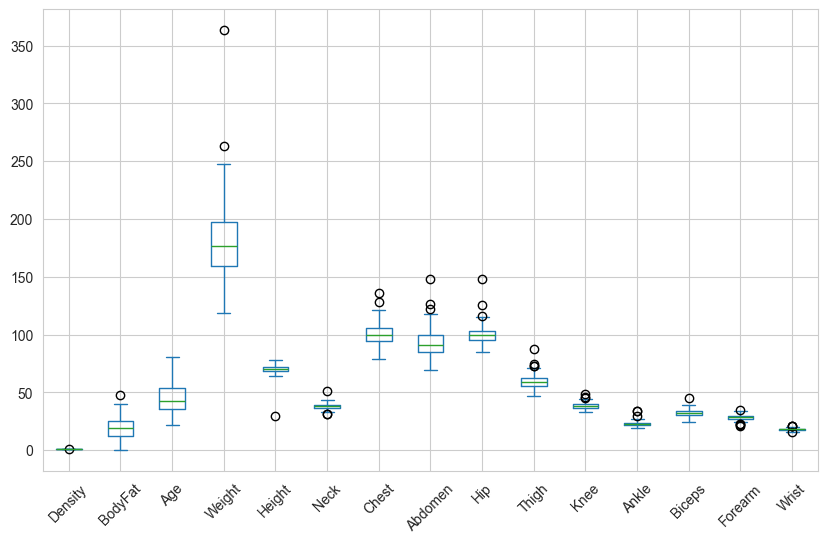

In [10]:
# Boxplot for outliers
df.plot(kind='box', figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

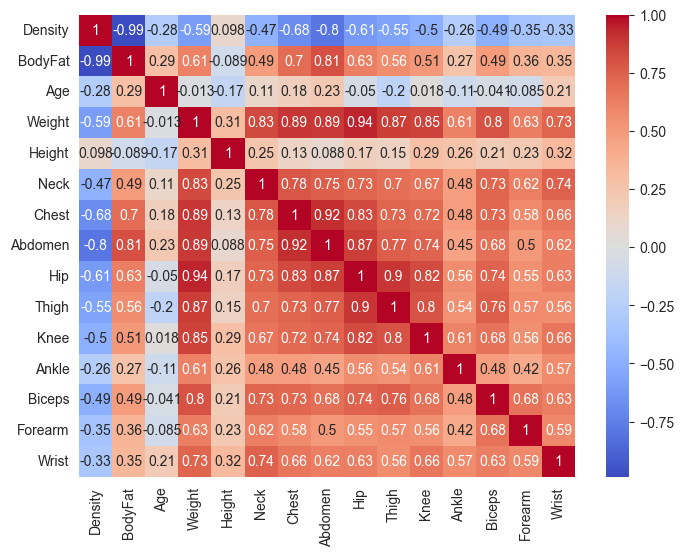

In [ ]:
# Heatmap for viewing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Model Performance:
Root Mean Squared Error: 4.24
R-squared Score: 0.61

Feature Coefficients:
Age: 0.0772
Weight: -0.0532
Height: -0.0957
Neck: -0.2513
Chest: -0.1395
Abdomen: 0.9606
Hip: -0.1255
Thigh: 0.1456
Knee: -0.1028
Ankle: 0.2685
Biceps: 0.2793
Forearm: 0.2509
Wrist: -1.8383
Intercept: -14.2798


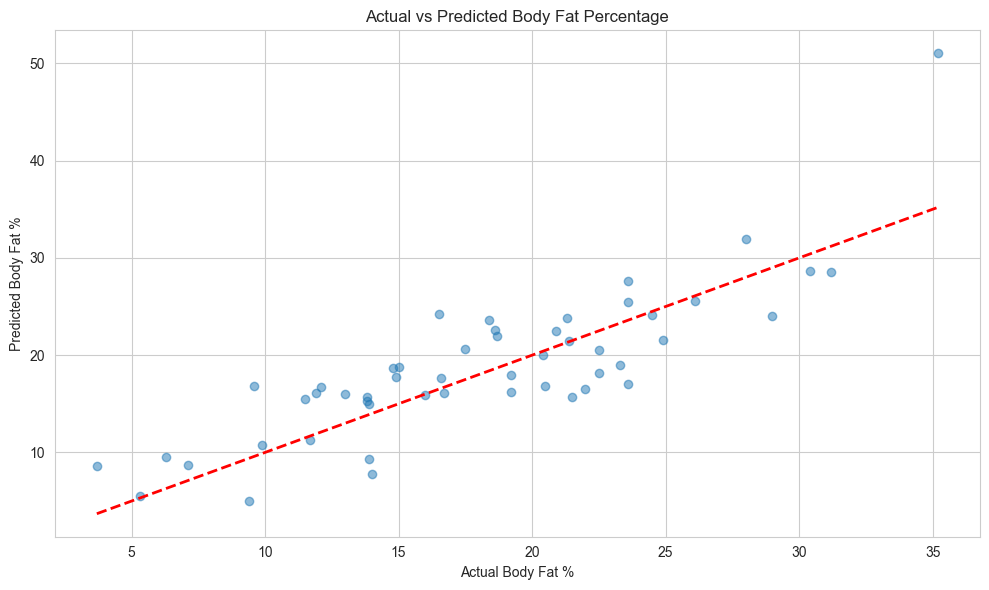

In [3]:
# Starting point 1 - linear regression model
# Prepare the data
features = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 
           'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
X = df[features]
y = df['BodyFat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Print coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Actual vs Predicted Body Fat Percentage')
plt.tight_layout()
plt.show()

Best Parameters: {'feature_selection__k': 5}

Best Model Performance on Test Set:
Root Mean Squared Error: 4.25
R-squared Score: 0.61

Cross-validation R² scores: 0.63 (+/- 0.39)

Selected Features: ['Weight', 'Chest', 'Abdomen', 'Hip', 'Thigh']

Feature Coefficients:
Weight: -3.7838
Chest: -0.6745
Abdomen: 11.0764
Hip: -0.7580
Thigh: 1.0094
Intercept: 19.4358


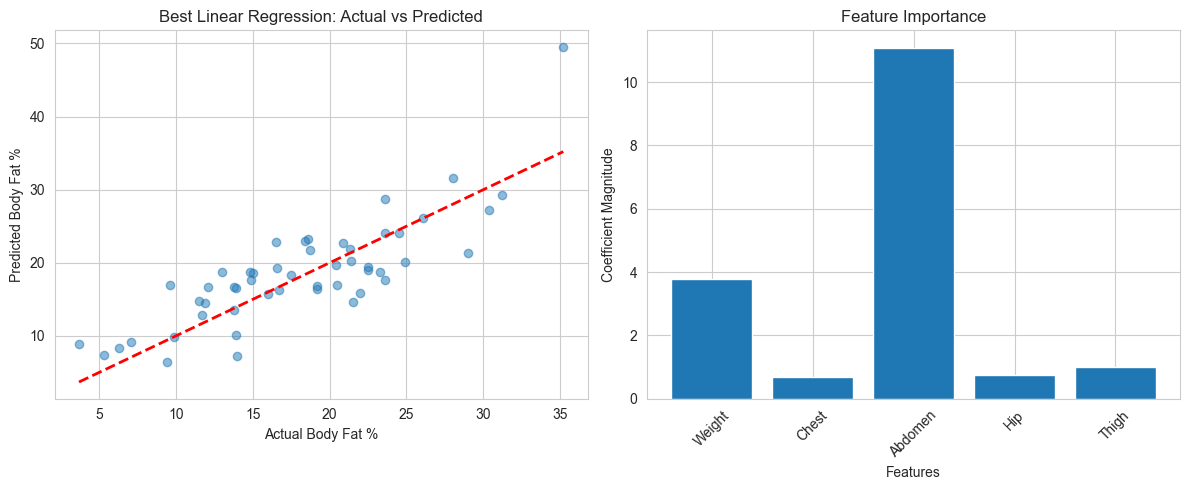


Grid Search Results Summary:
   param_feature_selection__k  mean_test_score  std_test_score
0                           5       -22.680932        4.174900
1                           8       -23.493539        3.530384
2                          10       -22.780953        3.490910
3                          12       -23.520273        2.707222


In [10]:
# Enhancement 1 - feature selection
# Prepare the data
features = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 
           'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
X = df[features]
y = df['BodyFat']

# Create a pipeline with feature selection, scaling, and Linear Regression
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Define parameter grid for tuning (only k since LinearRegression has no hyperparameters)
param_grid = {
    'feature_selection__k': [5, 8, 10, 12]  # Number of features to select
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimize for MSE
    n_jobs=-1  # Use all available CPU cores
)
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

# Make predictions with best model
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nBest Model Performance on Test Set:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Get cross-validation score of best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R² scores: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Get selected features
selected_mask = best_model.named_steps['feature_selection'].get_support()
selected_features = [features[i] for i, mask in enumerate(selected_mask) if mask]
print("\nSelected Features:", selected_features)

# Get coefficients
lr_coefs = best_model.named_steps['lr'].coef_
print("\nFeature Coefficients:")
for feature, coef in zip(selected_features, lr_coefs):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {best_model.named_steps['lr'].intercept_:.4f}")

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Best Linear Regression: Actual vs Predicted')

# Plot 2: Feature Importance
plt.subplot(1, 2, 2)
plt.bar(selected_features, np.abs(lr_coefs))
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()

# Display grid search results
results = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results Summary:")
print(results[['param_feature_selection__k', 'mean_test_score', 'std_test_score']])

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best Model Performance on Test Set:
Root Mean Squared Error: 4.03
R-squared Score: 0.65

Cross-validation R² scores: 0.58 (+/- 0.40)

Feature Importance:
Abdomen: 0.7386
Height: 0.0416
Chest: 0.0296
Age: 0.0247
Wrist: 0.0242
Weight: 0.0211
Knee: 0.0199
Neck: 0.0192
Hip: 0.0187
Ankle: 0.0179
Thigh: 0.0167
Biceps: 0.0155
Forearm: 0.0123


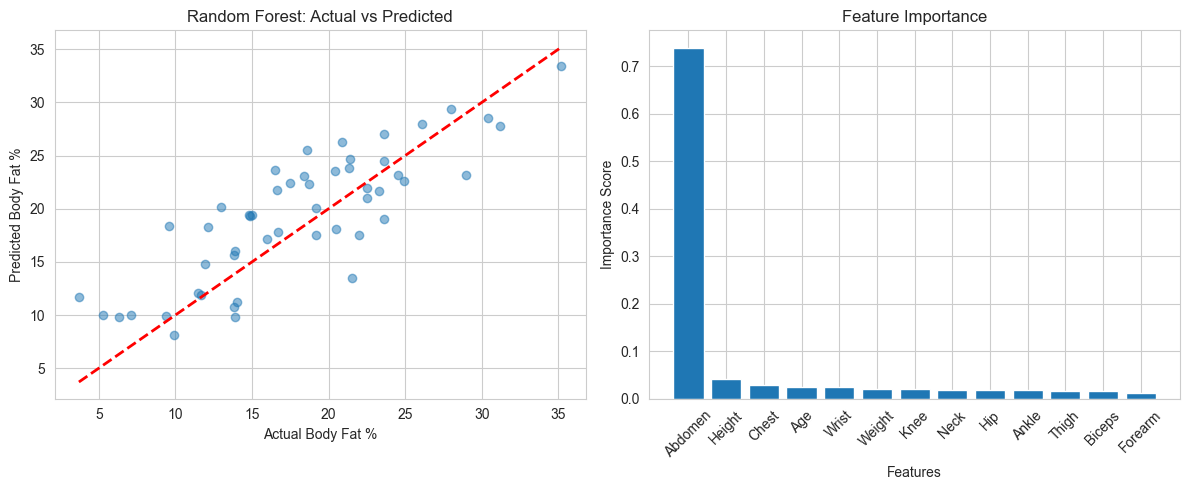


Grid Search Results Summary:
    param_n_estimators param_max_depth  param_min_samples_split  \
0                  100              10                        2   
1                  200              10                        2   
2                  300              10                        2   
3                  100              10                        5   
4                  200              10                        5   
..                 ...             ...                      ...   
76                 200            None                        5   
77                 300            None                        5   
78                 100            None                       10   
79                 200            None                       10   
80                 300            None                       10   

    param_min_samples_leaf  mean_test_score  std_test_score  
0                        1       -24.504548        2.963372  
1                        1       -24.7123

In [13]:
#Enhancement 2 - RandomForest
# Prepare the data
features = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 
           'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
X = df[features]
y = df['BodyFat']

# Handle missing values
X = X.dropna()
y = y[X.index]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model with GridSearchCV for hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples in a leaf node
}

# Perform grid search
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all CPU cores
)
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nBest Model Performance on Test Set:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Cross-validation score
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R² scores: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Feature importance
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

print("\nFeature Importance:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance:.4f}")

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Random Forest: Actual vs Predicted')

# Plot 2: Feature Importance
plt.subplot(1, 2, 2)
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()

# Optional: Display grid search results
results = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results Summary:")
print(results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
               'param_min_samples_leaf', 'mean_test_score', 'std_test_score']])

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

Best Model Performance on Test Set:
Root Mean Squared Error: 4.01
R-squared Score: 0.66

Cross-validation R² scores: 0.58 (+/- 0.39)

Feature Importance:
Abdomen: 0.7817
Height: 0.0378
Chest: 0.0259
Age: 0.0224
Wrist: 0.0217
Weight: 0.0182
Neck: 0.0166
Ankle: 0.0156
Hip: 0.0153
Thigh: 0.0131
Knee: 0.0121
Biceps: 0.0106
Forearm: 0.0090


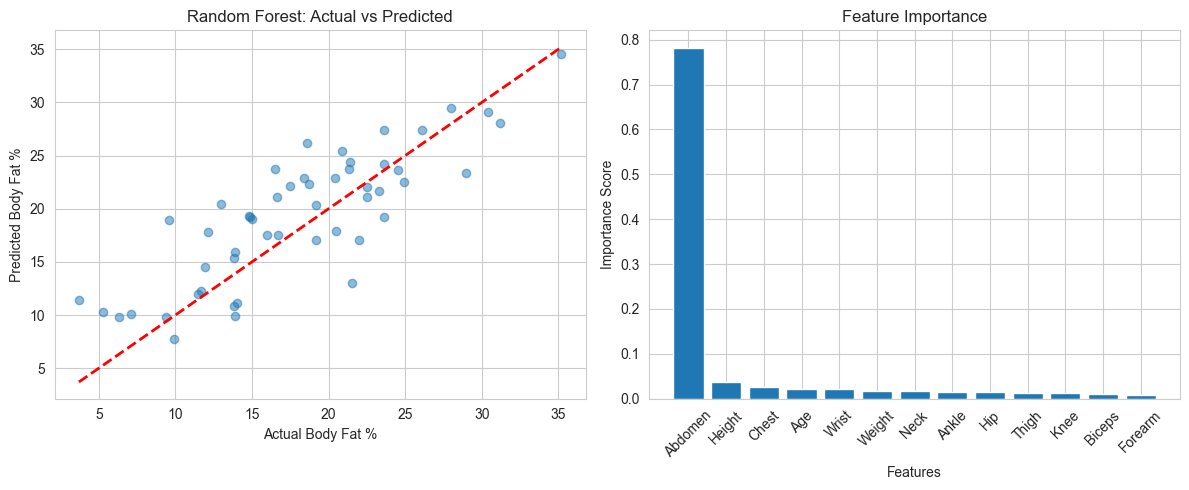


Grid Search Results Summary:
    param_n_estimators  param_max_depth  param_min_samples_split  \
0                  100                5                        5   
1                  200                5                        5   
2                  100                5                       10   
3                  200                5                       10   
4                  100                5                       20   
5                  200                5                       20   
6                  100                5                        5   
7                  200                5                        5   
8                  100                5                       10   
9                  200                5                       10   
10                 100                5                       20   
11                 200                5                       20   
12                 100                5                        5   
13                

In [ ]:
#Enhancement 3 - Updated parameter grid values
# Prepare the data
features = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 
           'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
X = df[features]
y = df['BodyFat']

# Handle missing values
X = X.dropna()
y = y[X.index]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model with GridSearchCV for hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees - removed 300
    'max_depth': [5, 10, 15],      # Maximum depth of trees - previous 10, 20, None
    'min_samples_split': [5, 10, 20],  # Minimum samples to split a node - previous 2, 5, 10
    'min_samples_leaf': [2, 4, 8]     # Minimum samples in a leaf node - 1, 2, 4
}

# Perform grid search
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all CPU cores
)
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nBest Model Performance on Test Set:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Cross-validation score
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R² scores: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Feature importance
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

print("\nFeature Importance:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance:.4f}")

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Random Forest: Actual vs Predicted')

# Plot 2: Feature Importance
plt.subplot(1, 2, 2)
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()

# Optional: Display grid search results
results = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results Summary:")
print(results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
               'param_min_samples_leaf', 'mean_test_score', 'std_test_score']])

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Best Model Performance on Test Set:
Root Mean Squared Error: 4.02
R-squared Score: 0.65

Cross-validation R² scores: 0.58 (+/- 0.40)

Feature Importance:
Abdomen: 0.7373
Height: 0.0378
Abdomen_Weight: 0.0267
Chest: 0.0262
Age: 0.0239
Wrist: 0.0235
Neck: 0.0186
Ankle: 0.0171
Hip: 0.0167
Weight: 0.0165
Thigh: 0.0152
Biceps: 0.0149
Knee: 0.0143
Forearm: 0.0113


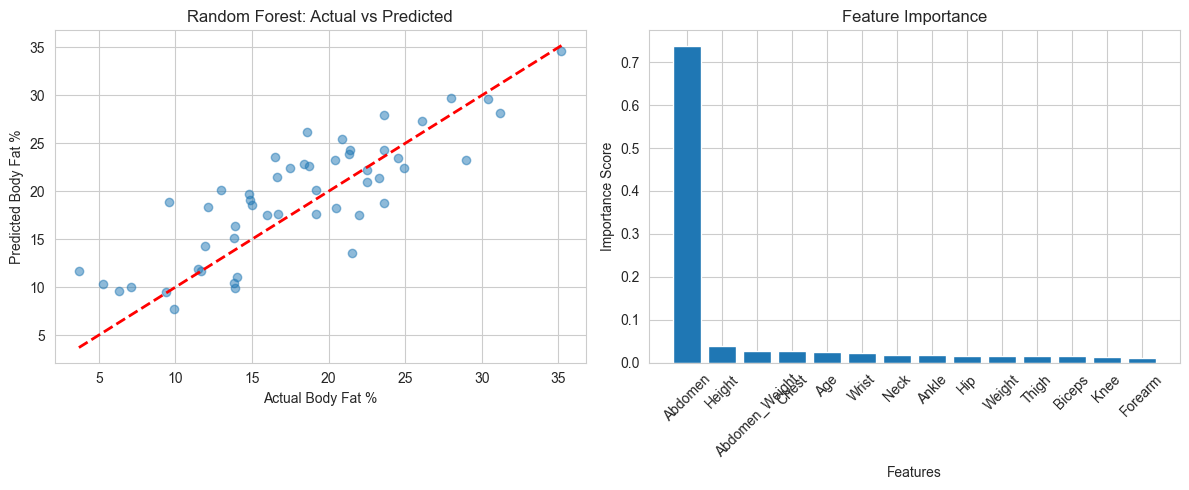


Grid Search Results Summary:
    param_n_estimators  param_max_depth  param_min_samples_split  \
0                  100                5                        5   
1                  200                5                        5   
2                  100                5                       10   
3                  200                5                       10   
4                  100                5                       20   
5                  200                5                       20   
6                  100                5                        5   
7                  200                5                        5   
8                  100                5                       10   
9                  200                5                       10   
10                 100                5                       20   
11                 200                5                       20   
12                 100                5                        5   
13                

In [ ]:
#Enhancement 4 - Feature engineering
# Prepare the data
features = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 
           'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
X = df[features]
y = df['BodyFat']

# Handle missing values
X = X.dropna()
y = y[X.index]

# Add the new feature using .loc to avoid the warning
X.loc[:, 'Abdomen_Weight'] = X['Abdomen'] * X['Weight']

# Update the features list to include the new feature
features = features + ['Abdomen_Weight']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model with GridSearchCV for hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees - removed 300
    'max_depth': [5, 10, 15],      # Maximum depth of trees - previous 10, 20, None
    'min_samples_split': [5, 10, 20],  # Minimum samples to split a node - previous 2, 5, 10
    'min_samples_leaf': [2, 4, 8]     # Minimum samples in a leaf node - 1, 2, 4
}

# Perform grid search
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all CPU cores
)
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nBest Model Performance on Test Set:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Cross-validation score
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R² scores: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Feature importance
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

print("\nFeature Importance:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance:.4f}")

# Visualization
plt.figure(figsize=(14, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Random Forest: Actual vs Predicted')

# Plot 2: Feature Importance
plt.subplot(1, 2, 2)
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation=90, ha='center')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()

# Optional: Display grid search results
results = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results Summary:")
print(results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
               'param_min_samples_leaf', 'mean_test_score', 'std_test_score']])

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

Best Model Performance on Test Set:
Root Mean Squared Error: 4.00
R-squared Score: 0.66

Cross-validation R² scores: 0.60 (+/- 0.39)

Feature Importance:
Abdomen: 0.7170
Abdomen_Hip_Ratio: 0.0911
Height: 0.0350
Chest: 0.0223
Wrist: 0.0188
Hip: 0.0171
Age: 0.0154
Neck: 0.0145
Ankle: 0.0142
Thigh: 0.0117
Knee: 0.0115
Weight: 0.0112
Biceps: 0.0106
Forearm: 0.0097


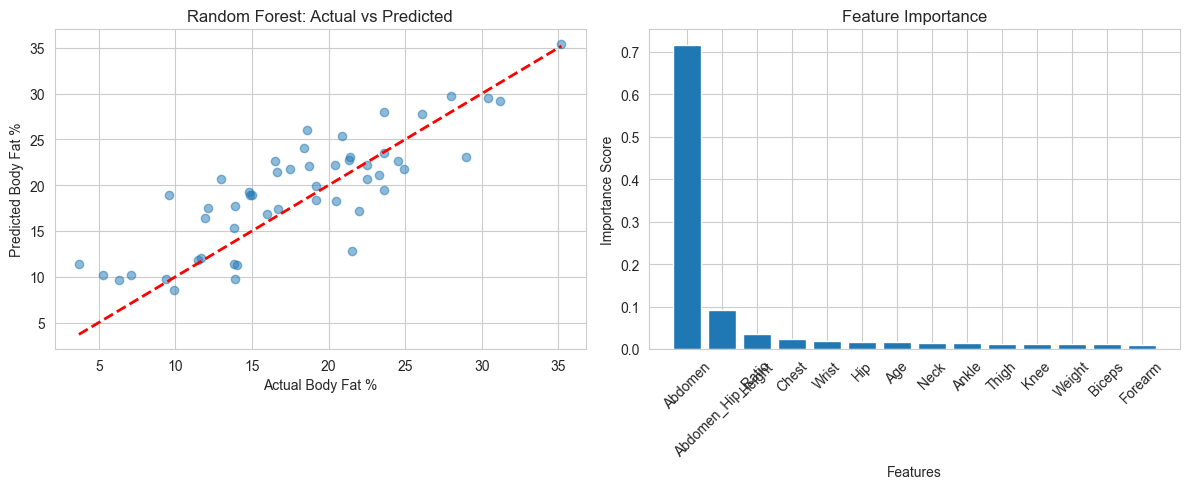


Grid Search Results Summary:
    param_n_estimators  param_max_depth  param_min_samples_split  \
0                  100                5                        5   
1                  200                5                        5   
2                  100                5                       10   
3                  200                5                       10   
4                  100                5                       20   
5                  200                5                       20   
6                  100                5                        5   
7                  200                5                        5   
8                  100                5                       10   
9                  200                5                       10   
10                 100                5                       20   
11                 200                5                       20   
12                 100                5                        5   
13                

In [ ]:
#Enhancement 5 - Feature engineering: Abdomen to hip ratio
# Prepare the data
features = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 
           'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
X = df[features]
y = df['BodyFat']

# Handle missing values
X = X.dropna()
y = y[X.index]

# Add the new feature using .loc to avoid the warning
X.loc[:, 'Abdomen_Hip_Ratio'] = X['Abdomen'] / X['Hip']

# Update the features list to include the new feature
#features = features + ['Abdomen_Weight']
features.append('Abdomen_Hip_Ratio')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model with GridSearchCV for hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees - removed 300
    'max_depth': [5, 10, 15],      # Maximum depth of trees - previous 10, 20, None
    'min_samples_split': [5, 10, 20],  # Minimum samples to split a node - previous 2, 5, 10
    'min_samples_leaf': [2, 4, 8]     # Minimum samples in a leaf node - 1, 2, 4
}

# Perform grid search
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all CPU cores
)
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nBest Model Performance on Test Set:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Cross-validation score
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R² scores: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Feature importance
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

print("\nFeature Importance:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance:.4f}")

# Visualization
plt.figure(figsize=(14, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Random Forest: Actual vs Predicted')

# Plot 2: Feature Importance
plt.subplot(1, 2, 2)
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation=90, ha='center')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()

# Optional: Display grid search results
results = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results Summary:")
print(results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
               'param_min_samples_leaf', 'mean_test_score', 'std_test_score']])

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Best Model Performance on Test Set:
Root Mean Squared Error: 4.23
R-squared Score: 0.71

Cross-validation R² scores: 0.58 (+/- 0.36)

Feature Importance:
Abdomen: 0.6437
Abdomen_Hip_Ratio: 0.1595
Wrist: 0.0350
Height: 0.0248
Hip: 0.0221
Neck: 0.0161
Chest: 0.0158
Ankle: 0.0157
Age: 0.0146
Thigh: 0.0137
Knee: 0.0122
Weight: 0.0101
Biceps: 0.0093
Forearm: 0.0073


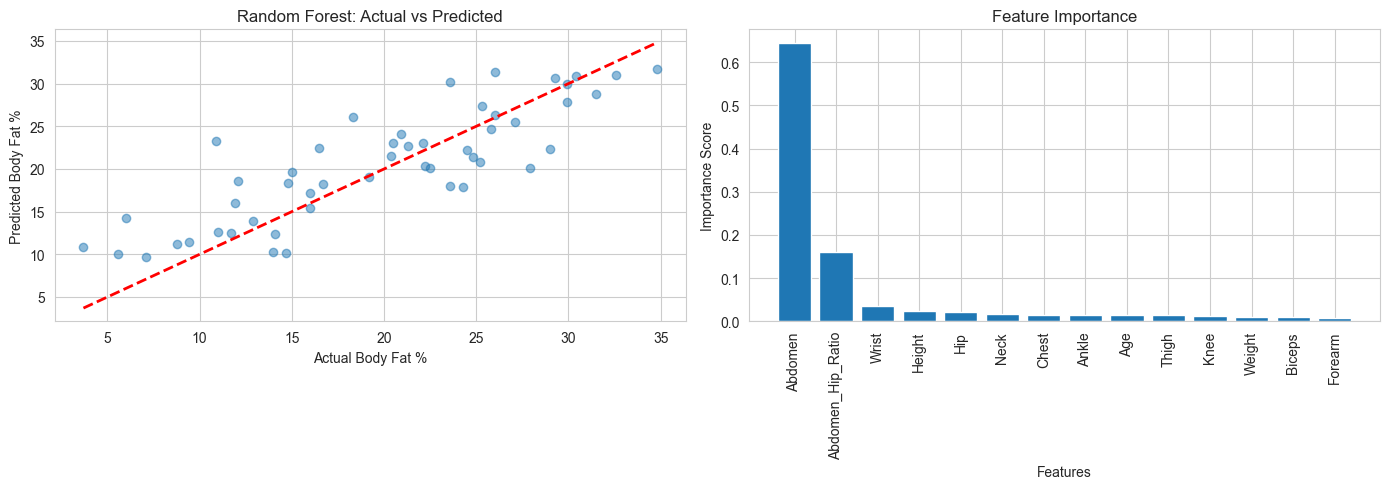


Grid Search Results Summary:
    param_n_estimators  param_max_depth  param_min_samples_split  \
0                  100                5                        5   
1                  200                5                        5   
2                  100                5                       10   
3                  200                5                       10   
4                  100                5                       20   
5                  200                5                       20   
6                  100                5                        5   
7                  200                5                        5   
8                  100                5                       10   
9                  200                5                       10   
10                 100                5                       20   
11                 200                5                       20   
12                 100                5                        5   
13                

In [20]:
#Enhancement 6 - Outliers for Abdomen data only
# Prepare the data
features = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 
           'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
X = df[features]
y = df['BodyFat']

# Handle missing values
X = X.dropna()
y = y[X.index]

# Handle outliers in Abdomen (remove top/bottom 1%)
X = X[(X['Abdomen'] < X['Abdomen'].quantile(0.99)) & 
      (X['Abdomen'] > X['Abdomen'].quantile(0.01))]
y = y[X.index]

# Add the new feature using .loc to avoid the warning
X.loc[:, 'Abdomen_Hip_Ratio'] = X['Abdomen'] / X['Hip']

# Update the features list to include the new feature
#features = features + ['Abdomen_Weight']
features.append('Abdomen_Hip_Ratio')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model with GridSearchCV for hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees - removed 300
    'max_depth': [5, 10, 15],      # Maximum depth of trees - previous 10, 20, None
    'min_samples_split': [5, 10, 20],  # Minimum samples to split a node - previous 2, 5, 10
    'min_samples_leaf': [2, 4, 8]     # Minimum samples in a leaf node - 1, 2, 4
}

# Perform grid search
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all CPU cores
)
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nBest Model Performance on Test Set:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Cross-validation score
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R² scores: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Feature importance
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

print("\nFeature Importance:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance:.4f}")

# Visualization
plt.figure(figsize=(14, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted Body Fat %')
plt.title('Random Forest: Actual vs Predicted')

# Plot 2: Feature Importance
plt.subplot(1, 2, 2)
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation=90, ha='center')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()

# Optional: Display grid search results
results = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results Summary:")
print(results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
               'param_min_samples_leaf', 'mean_test_score', 'std_test_score']])